
Proyecto 2 - Ingeniería de features, Modelos avanzados e Interpretación de modelos¶
Análisis mercado inmobiliario en base a la empresa Properati
DS-56 / Kevin Caballero / Marzo 2021


Problema
Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.


De ésta forma el proyecto tendrá tres partes:

PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

Detección y eliminación de Outliers
Encoding
Imputación de valores faltantes
Escalado de datos
Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).
Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?

DESAFÍO OPCIONAL
Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

Ahora bien, a trabajar en este proyecto, se ofrece como recurso una muestra del conjunto de publicaciones de propiedades en venta dentro de la inmobiliaria Properati disponible en su página web. https://www.properati.com.ar/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data1= pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
print('El dataset tiene', data1.shape[0], 'filas y', data1.shape[1], 'columnas.')

El dataset tiene 146660 filas y 19 columnas.


In [3]:

data = data1.drop(['lon','lat','start_date','end_date','created_on', 'currency', 'l1', 'operation_type' ], axis=1)

PROCEDO A IMPORTAR LOS FILTROS PROVEIDOS EN EL TP1 PARA FILTRAR EL DATASET, NO OBSTANTE, NO INCLUYO DROP NA, PARA HACER IMPUTACION DE DATOS, Y PREPROCESAR LOS DATOS ANTES DE CORRER MODELOS, y TAMBIEN ME DESHAGO DE LOS ERRORES DE CARGA DONDE LAS SUPERFICIES CUBIERTAS SON MAYORES A LAS TOTALES, TAL COMO SUGIERE EL TP1

In [4]:
data_raiz = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
data = data_raiz[(data_raiz['l2'] == "Capital Federal") & (data_raiz.property_type.isin(['Departamento','Casa','PH']))]
data = data[(data['surface_total'] >= 15) & (data['surface_total'] <= 1000)]
data = data[(data['price'] <= 4000000)]
data = data.filter(items=['property_type','rooms', 'bedrooms','bathrooms','surface_total', 'surface_covered', 'price'])
mask_surface = data['surface_covered'] <= data['surface_total']

data = data[mask_surface]
print('Checkpoint: ', data.shape)

Checkpoint:  (81105, 7)


Despues de visualizar las columnas del dataset, procedo a eliminar todas aquellas columnas que no me seran utiles para este trabajo en especifico, por que no influyen en el precio de la propiedad

In [5]:
data.shape

(81105, 7)

In [6]:
data.head()

,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,2.0,1.0,1.0,85.0,50.0,295000.0
5,PH,2.0,1.0,1.0,56.0,56.0,150000.0


In [7]:
print('Los tipos de propiedades en anuncios son: ', data['property_type'].unique())
print(data['property_type'].value_counts())
print(data.shape)

Los tipos de propiedades en anuncios son:  ['Departamento' 'PH' 'Casa']
Departamento    69474
PH               9611
Casa             2020
Name: property_type, dtype: int64
(81105, 7)


A simple vista se puede inferir que la mayoria son departamentos en la capital federal

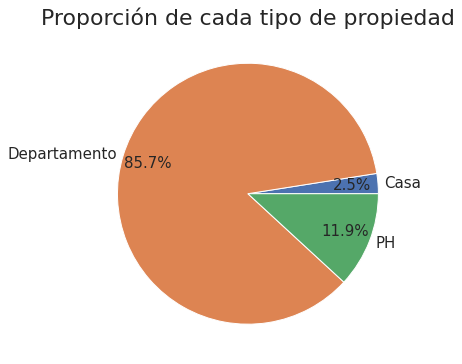

In [8]:
property_types = data["property_type"].value_counts()
property_types = property_types.groupby(np.where(property_types >= 2000, property_types.index, 'Otras propiedades')).sum()

fig1, ax1 = plt.subplots(figsize=(14,6))

ax1.pie(x = property_types,labels = property_types.index,
        autopct = '%1.1f%%',textprops = {'fontsize': 15},
        pctdistance = 0.8,labeldistance = 1.05)

#ax1.axis('equal')
plt.title("Proporción de cada tipo de propiedad", size=22)

plt.show()

In [9]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81105.000000,81105.000000,80276.000000,81105.000000,81105.000000,8.110500e+04
mean,3.004044,1.998188,1.553640,95.292263,81.992257,2.635069e+05
std,1.297403,1.044806,0.850479,77.153348,61.487416,2.986440e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,891.000000,4.000000e+06


In [10]:
data.shape

(81105, 7)

# Tratamiento de Outliers
Primeramente procedo a filtrar valores atípicos, un método muy usado es filtrar los valores de una variable utilizando el IQR (rango intercuartilico), que a diferencia del proyecto anterior que usé como límite el percentil 99, y otros filtros escogidos objetivamente en base a observaciones, aplicaré nuevos metodos sabiendo que es lo mejor en este caso.

In [11]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81105.000000,81105.000000,80276.000000,81105.000000,81105.000000,8.110500e+04
mean,3.004044,1.998188,1.553640,95.292263,81.992257,2.635069e+05
std,1.297403,1.044806,0.850479,77.153348,61.487416,2.986440e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,891.000000,4.000000e+06


empezare a observar la distribucion de surface total puesto que tiene la desviacion estandar mas elevada

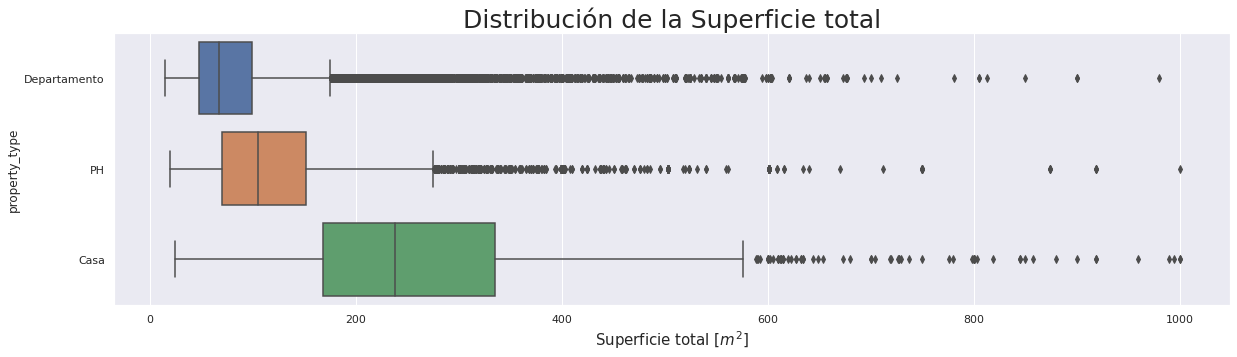

In [12]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'surface_total', y = 'property_type', data = data)
plt.xlabel('Superficie total [$m^{2}$]', size = 15)
plt.title('Distribución de la Superficie total',size = 25)
plt.show()

In [13]:
q1_sup = data['surface_total'].quantile(0.25)
q3_sup = data['surface_total'].quantile(0.75)
iq_sup = q3_sup - q1_sup
op = q3_sup+1.5*iq_sup
min_q=q1_sup-1.5*iq_sup
#MIN = Q1 - 1.5 * IQR


print("minimo : {}".format(min_q))
print("Primer cuartil: {}".format(q1_sup))
print("Tercer cuartil: {}".format(q3_sup))
print("Rango intercuartílico: {}".format(iq_sup))
print("Rango óptimo MAX: {}".format(op))

minimo : -42.5
Primer cuartil: 49.0
Tercer cuartil: 110.0
Rango intercuartílico: 61.0
Rango óptimo MAX: 201.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


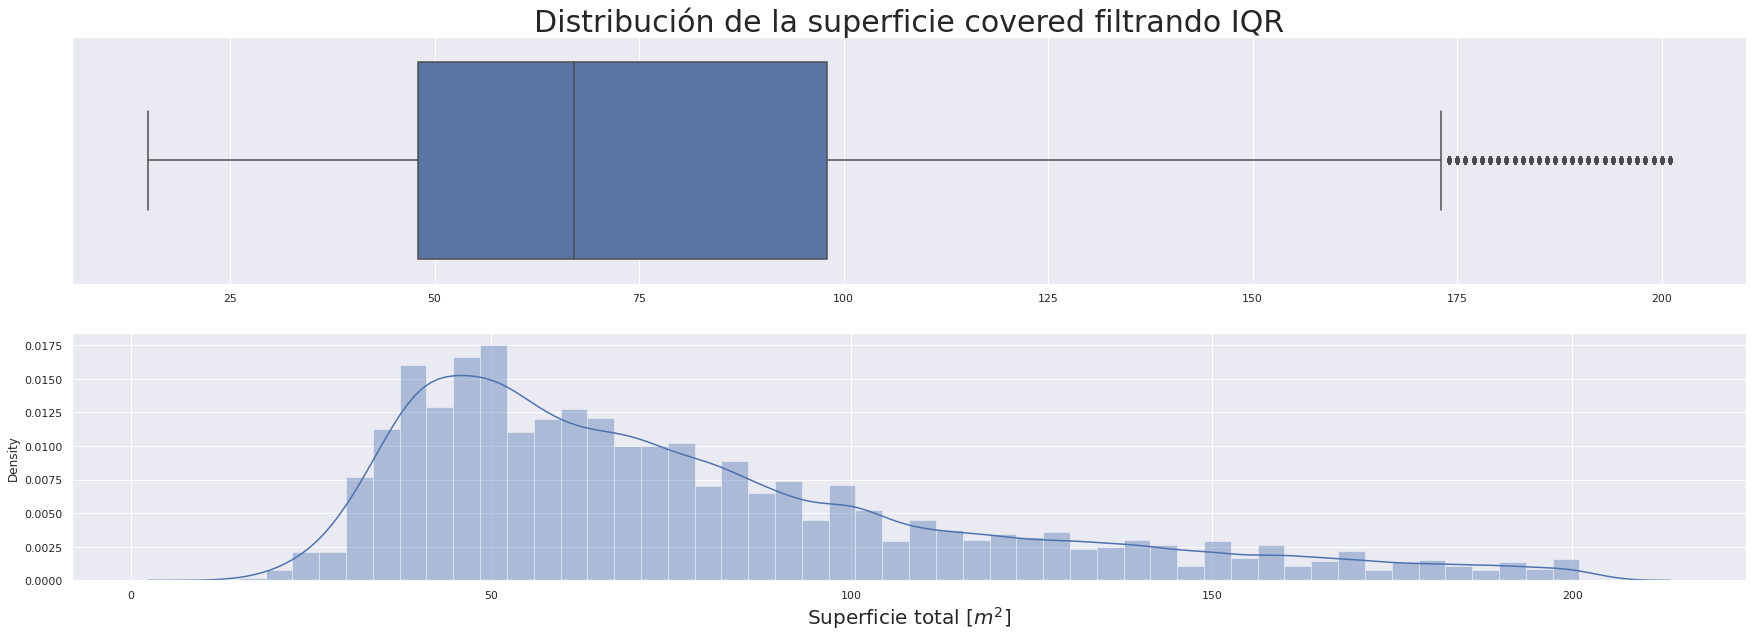

In [14]:
op_sup = data['surface_total'] < 201.5 

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data['surface_total'][op_sup])
plt.xlabel("")
plt.title('Distribución de la superficie covered filtrando IQR', size = 30)

plt.subplot(2,1,2)
sns.distplot(data['surface_total'][op_sup])
plt.xlabel('Superficie total [$m^{2}$]', size = 20)

plt.show()

In [15]:
print('Las propiedades con más de 201.5 metros cuadrados de Superficie total respresentan el', 
      round((data[data.surface_total > 201.5].shape[0]/data.surface_total.shape[0])*100,2),'% de nuestro dataset al momento.')

Las propiedades con más de 201.5 metros cuadrados de Superficie total respresentan el 7.59 % de nuestro dataset al momento.


In [16]:
data_clean=data
data_clean2=data.copy()

In [17]:
#data_clean.drop(data_clean[data_clean["surface_total"] < 29].index, inplace= True)
data_clean.drop(data_clean[data_clean["surface_total"] > 201.5].index, inplace= True)
#data_clean2.drop(data_clean2[data_clean2["surface_total"] > 201.5].index, inplace= True)

In [18]:
data_clean.describe()
#data_clean2.describe

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74949.000000,74949.000000,74190.000000,74949.000000,74949.000000,7.494900e+04
mean,2.820011,1.861919,1.440275,78.019934,69.078787,2.137242e+05
std,1.076130,0.906088,0.702942,39.553759,34.421533,1.539607e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,43.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,67.000000,60.000000,1.700000e+05
75%,4.000000,2.000000,2.000000,98.000000,85.000000,2.524000e+05
max,21.000000,15.000000,14.000000,201.000000,201.000000,3.249900e+06


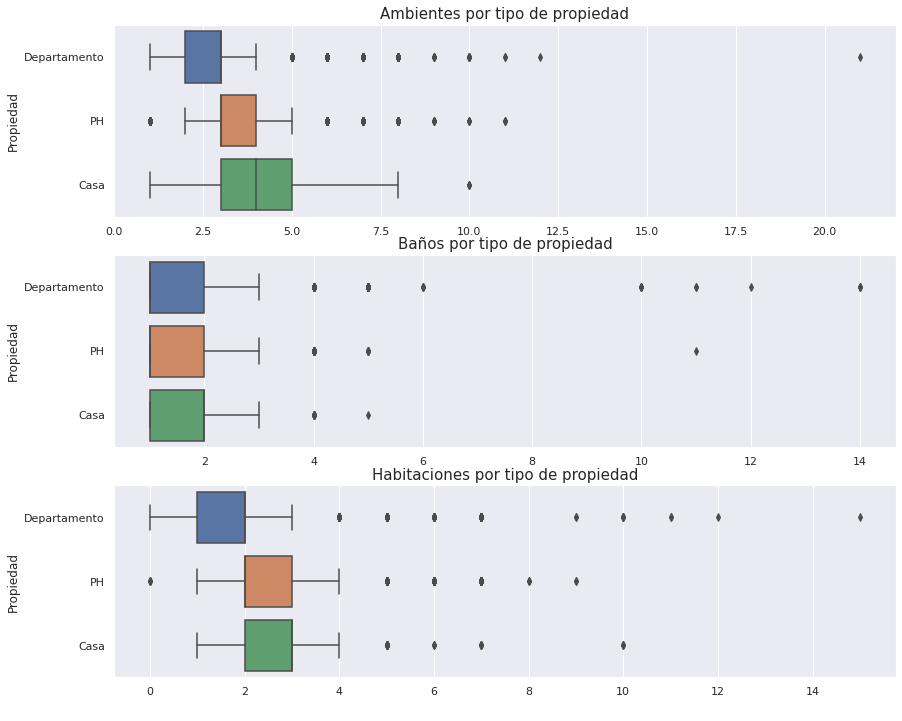

In [19]:
#comienzo trabajando con las categorias numericas continuas
plt.figure(figsize = (14,12)) 

plt.subplot(3,1,1)
sns.boxplot(data=data_clean, x='rooms', y='property_type')
plt.title('Ambientes por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.subplot(3,1,2)
sns.boxplot(data=data_clean, x='bathrooms', y='property_type')
plt.title('Baños por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.subplot(3,1,3)
sns.boxplot(data=data_clean, x='bedrooms', y='property_type')
plt.title('Habitaciones por tipo de propiedad', size=15)
plt.ylabel('Propiedad')
plt.xlabel(' ')

plt.show()

Q25:  2.0 
Q75:  4.0 
IQR:  2.0
Rango óptimo MAX:  7.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


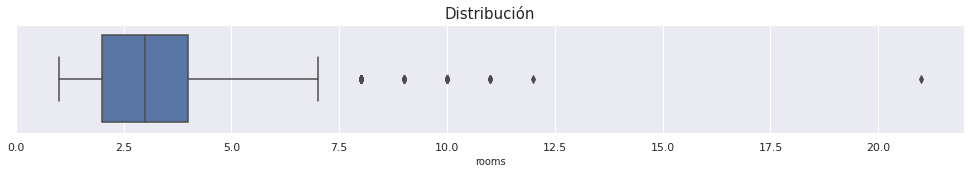

In [20]:
q25,q75 = np.percentile(data_clean.rooms, 25), np.percentile(data_clean.rooms, 75)
iqr = q75 - q25
print('Q25: ', q25,'\nQ75: ',q75, '\nIQR: ',iqr)
print('Rango óptimo MAX: ', q75 + 1.5* iqr)

plt.figure(figsize = (17,2)) #box
sns.boxplot(data_clean['rooms'])
plt.xlabel('rooms', size = 10)
plt.title('Distribución',size = 15)
plt.show()

PROCEDO A FILTRAR POR ROOMS, POR SER LA VARIABLE CON MAYOR STD, UTILIZO EL IQR PARA FILTRAR AQUELLAS PROPIEDADES CON MAS DE 7 ROOMS

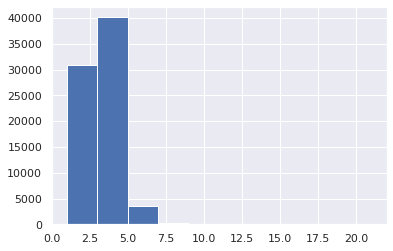

In [21]:
data_clean.rooms.hist()

In [22]:
data_clean.rooms.value_counts().sort_index()

1.0      6478
2.0     24480
3.0     25250
4.0     14892
5.0      2983
6.0       584
7.0       144
8.0       107
9.0        10
10.0       14
11.0        5
12.0        1
21.0        1
Name: rooms, dtype: int64

In [23]:
data_clean.drop(data_clean[data_clean["rooms"] > 7].index, inplace= True)

In [24]:
data_clean.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74811.000000,74811.000000,74052.000000,74811.000000,74811.000000,7.481100e+04
mean,2.809520,1.853257,1.439421,77.861865,68.915480,2.136195e+05
std,1.047346,0.881185,0.701929,39.401405,34.217954,1.540212e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,48.000000,43.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,67.000000,60.000000,1.699000e+05
75%,3.000000,2.000000,2.000000,98.000000,85.000000,2.519500e+05
max,7.000000,15.000000,14.000000,201.000000,201.000000,3.249900e+06


Q25:  1.0 
Q75:  2.0 
IQR:  1.0
Rango óptimo MAX:  3.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


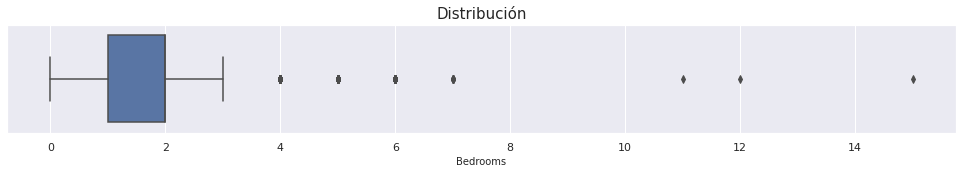

In [25]:
q25,q75 = np.percentile(data_clean.bedrooms, 25), np.percentile(data_clean.bedrooms, 75)
iqr = q75 - q25
print('Q25: ', q25,'\nQ75: ',q75, '\nIQR: ',iqr)
print('Rango óptimo MAX: ', q75 + 1.5* iqr)

plt.figure(figsize = (17,2)) #box
sns.boxplot(data_clean['bedrooms'])
plt.xlabel('Bedrooms', size = 10)
plt.title('Distribución',size = 15)
plt.show()

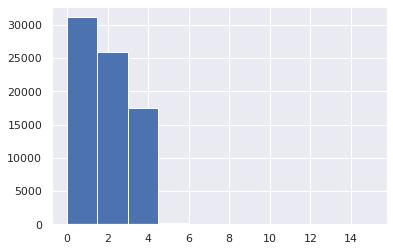

In [26]:
data_clean.bedrooms.hist()

In [27]:
data_clean.bedrooms.value_counts().sort_index()

0.0       437
1.0     30692
2.0     25870
3.0     15404
4.0      2142
5.0       193
6.0        61
7.0         9
11.0        1
12.0        1
15.0        1
Name: bedrooms, dtype: int64

In [28]:
data_clean.drop(data_clean[data_clean["bedrooms"] > 3.5].index, inplace= True)
data_clean.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,72403.000000,72403.000000,71697.000000,72403.000000,72403.000000,7.240300e+04
mean,2.730798,1.776777,1.408706,75.619187,66.831319,2.101069e+05
std,0.963564,0.781653,0.673036,37.533663,32.250109,1.531770e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,47.000000,43.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,66.000000,58.000000,1.673830e+05
75%,3.000000,2.000000,2.000000,94.000000,81.000000,2.490000e+05
max,7.000000,3.000000,14.000000,201.000000,200.000000,3.249900e+06


procedo a estudiar la distribucion de bathrooms puesto que 14 baños me parecen demasiados para propiedades de estas caracteristicas

In [29]:
data_clean.bathrooms.value_counts().sort_index()

1.0     48483
2.0     18158
3.0      4190
4.0       771
5.0        84
10.0        4
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

In [30]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72403 entries, 1 to 146557
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    72403 non-null  object 
 1   rooms            72403 non-null  float64
 2   bedrooms         72403 non-null  float64
 3   bathrooms        71697 non-null  float64
 4   surface_total    72403 non-null  float64
 5   surface_covered  72403 non-null  float64
 6   price            72403 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.4+ MB


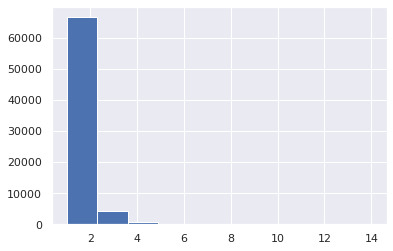

In [31]:
data_clean.bathrooms.hist()

Q25:  1.0 
Q75:  2.0 
IQR:  1.0
Rango óptimo MAX:  3.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


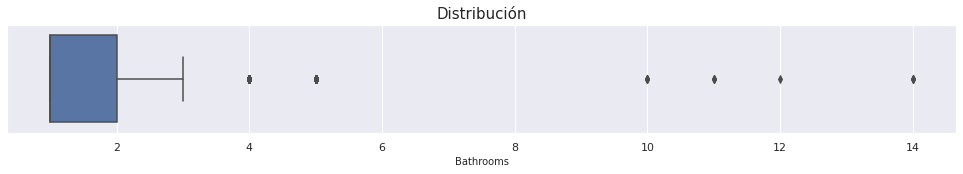

In [32]:
q25,q75 = np.nanpercentile(data_clean.bathrooms, 25), np.nanpercentile(data_clean.bathrooms, 75)
iqr = q75 - q25
print('Q25: ', q25,'\nQ75: ',q75, '\nIQR: ',iqr)
print('Rango óptimo MAX: ', q75 + 1.5* iqr)

plt.figure(figsize = (17,2)) #box
sns.boxplot(data_clean['bathrooms'])
plt.xlabel('Bathrooms', size = 10)
plt.title('Distribución',size = 15)
plt.show()

In [33]:
def f_intercuartilico(data_set, columna):
    Q1, Q3 = np.nanpercentile(data_set[columna], [25 ,75])
    IQR = Q3 - Q1
    MIN = Q1 - 1.5 * IQR
    MAX = Q3 + 1.5 * IQR
    return MIN, MAX


In [34]:
f_intercuartilico(data_clean,"bathrooms")

(-0.5, 3.5)

In [35]:
print('Las propiedades con más de 3.5 baños respresentan el', round((data_clean[data_clean.bathrooms > 3.5].shape[0]/data_clean.bathrooms.shape[0])*100,2),'% de nuestro dataset al momento.')

Las propiedades con más de 3.5 baños respresentan el 1.2 % de nuestro dataset al momento.


In [36]:
data_clean.drop(data_clean[data_clean["bathrooms"] > 3.5].index, inplace= True)

In [37]:
data_clean.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,71537.000000,71537.000000,70831.000000,71537.000000,71537.000000,7.153700e+04
mean,2.715700,1.763619,1.374666,74.660721,65.933223,2.051033e+05
std,0.957509,0.776014,0.593807,36.601748,31.249199,1.422631e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,47.000000,43.000000,1.190000e+05
50%,3.000000,2.000000,1.000000,65.000000,58.000000,1.650000e+05
75%,3.000000,2.000000,2.000000,92.000000,80.000000,2.450000e+05
max,7.000000,3.000000,3.000000,201.000000,200.000000,3.249900e+06


In [38]:
data_clean.shape

(71537, 7)

In [39]:

q1_price = data_clean['price'].quantile(0.25)
q3_price = data_clean['price'].quantile(0.75)
iq_price = q3_price - q1_price
op_price = q3_price+1.5*iq_price

print("Primer cuartil: {}".format(q1_price))
print("Tercer cuartil: {}".format(q3_price))
print("Rango intercuartílico: {}".format(iq_price))
print("Rango óptimo MAX: {}".format(op_price))

Primer cuartil: 119000.0
Tercer cuartil: 245000.0
Rango intercuartílico: 126000.0
Rango óptimo MAX: 434000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


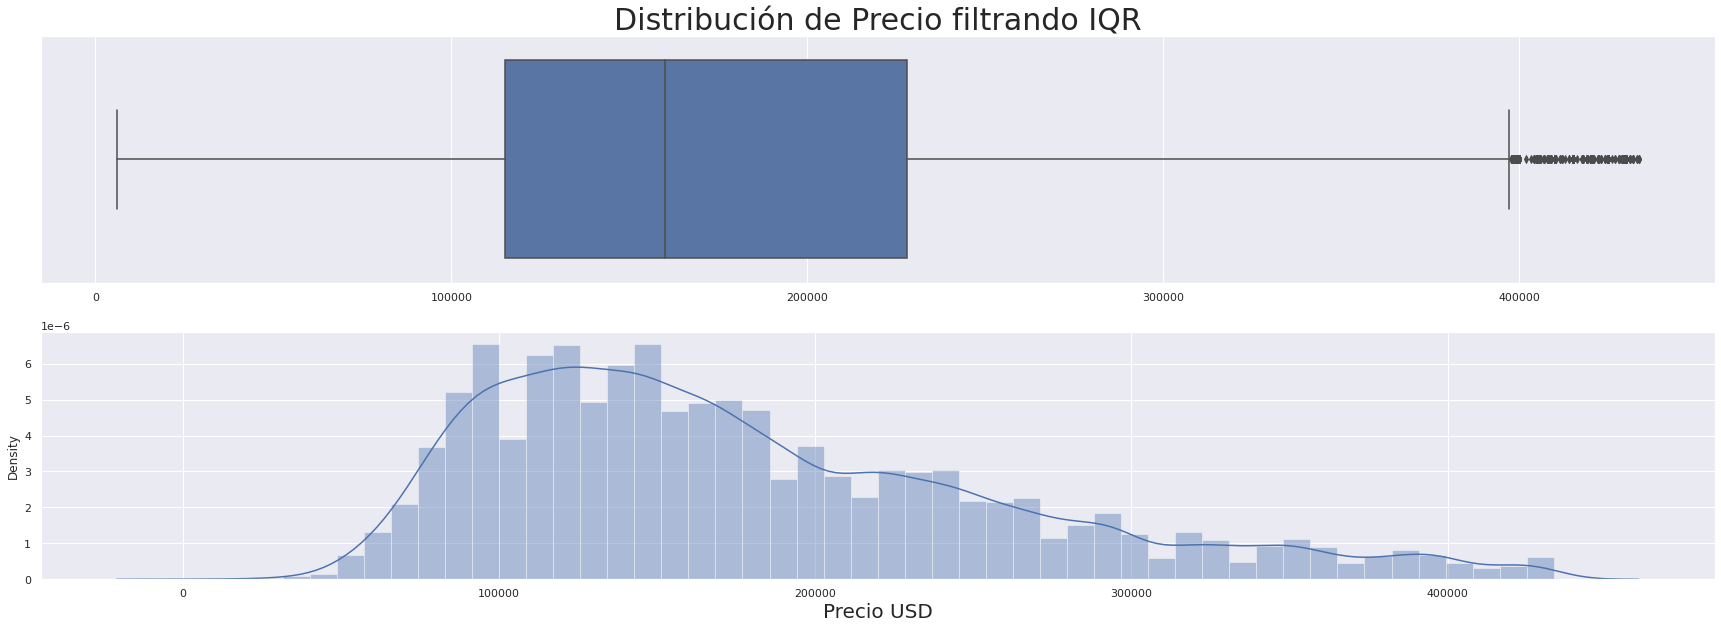

In [40]:
op_price = data_clean['price'] < 434000

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data_clean['price'][op_price])
plt.xlabel("")
plt.title('Distribución de Precio filtrando IQR', size = 30)

plt.subplot(2,1,2)
sns.distplot(data_clean['price'][op_price])
plt.xlabel('Precio USD', size = 20)

plt.show()

In [41]:
print('Las propiedades con precio de más de 434000 USD respresentan el', 
      round((data_clean[data_clean.price > 434000].shape[0]/data_clean.price.shape[0])*100,2),'% de nuestro dataset al momento.')

Las propiedades con precio de más de 434000 USD respresentan el 5.82 % de nuestro dataset al momento.


In [42]:
data_clean.drop(data_clean[data_clean["price"] > 434000].index, inplace= True)

In [43]:
data_clean.shape

(67375, 7)

In [44]:
data_clean.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,67375.000000,67375.000000,66700.000000,67375.000000,67375.000000,67375.000000
mean,2.657796,1.719466,1.316042,70.639763,62.127525,178868.810212
std,0.932266,0.761769,0.541697,32.811843,26.913000,82644.363361
min,1.000000,0.000000,1.000000,15.000000,2.000000,6000.000000
25%,2.000000,1.000000,1.000000,46.000000,42.000000,115000.000000
50%,3.000000,2.000000,1.000000,63.000000,56.000000,159900.000000
75%,3.000000,2.000000,2.000000,86.000000,76.000000,228000.000000
max,7.000000,3.000000,3.000000,201.000000,200.000000,434000.000000


In [45]:
print('Cantidad de Valores Faltantes por atributos:') 
print(data_clean.isnull().sum())

Cantidad de Valores Faltantes por atributos:
property_type        0
rooms                0
bedrooms             0
bathrooms          675
surface_total        0
surface_covered      0
price                0
dtype: int64


# Tratamiento de Valores Faltantes baños

Procedo a imputar los valores faltantes en bathrooms con su mediana, puesto que no tendria mucho sentido usar el promedio en este caso

In [46]:
data_clean.bathrooms.median()


1.0

In [47]:
data_clean['bathrooms'].fillna(data_clean['bathrooms'].median(), inplace=True)
 


In [48]:
print(data_clean.isnull().sum())

property_type      0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64


In [49]:
data_clean.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,67375.000000,67375.000000,67375.000000,67375.000000,67375.000000,67375.000000
mean,2.657796,1.719466,1.312876,70.639763,62.127525,178868.810212
std,0.932266,0.761769,0.539894,32.811843,26.913000,82644.363361
min,1.000000,0.000000,1.000000,15.000000,2.000000,6000.000000
25%,2.000000,1.000000,1.000000,46.000000,42.000000,115000.000000
50%,3.000000,2.000000,1.000000,63.000000,56.000000,159900.000000
75%,3.000000,2.000000,2.000000,86.000000,76.000000,228000.000000
max,7.000000,3.000000,3.000000,201.000000,200.000000,434000.000000


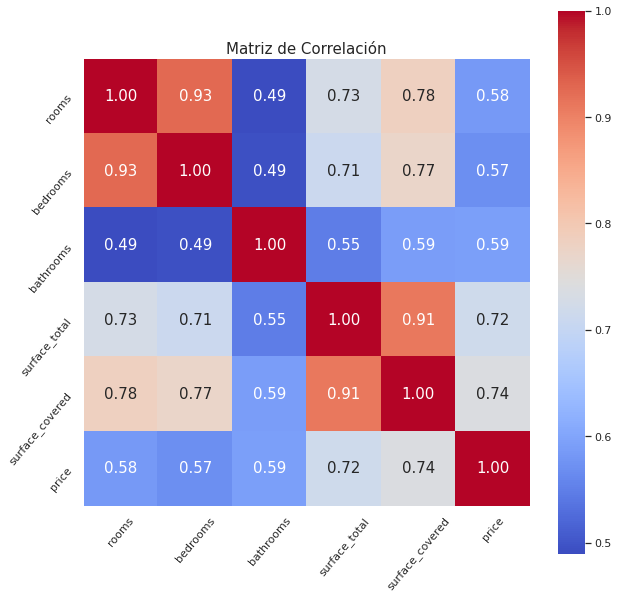

In [50]:
corr = data_clean.corr(method='pearson', min_periods=1) #saco la correlación para graficar
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm') #paleta de  colores
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.title('Matriz de Correlación', size = 15)
plt.show()

In [51]:
#Dividimos la variable categórica 

dptos = data_clean[data_clean.property_type == 'Departamento']
casas = data_clean[data_clean.property_type == 'Casa']
ph = data_clean[data_clean.property_type == 'PH']

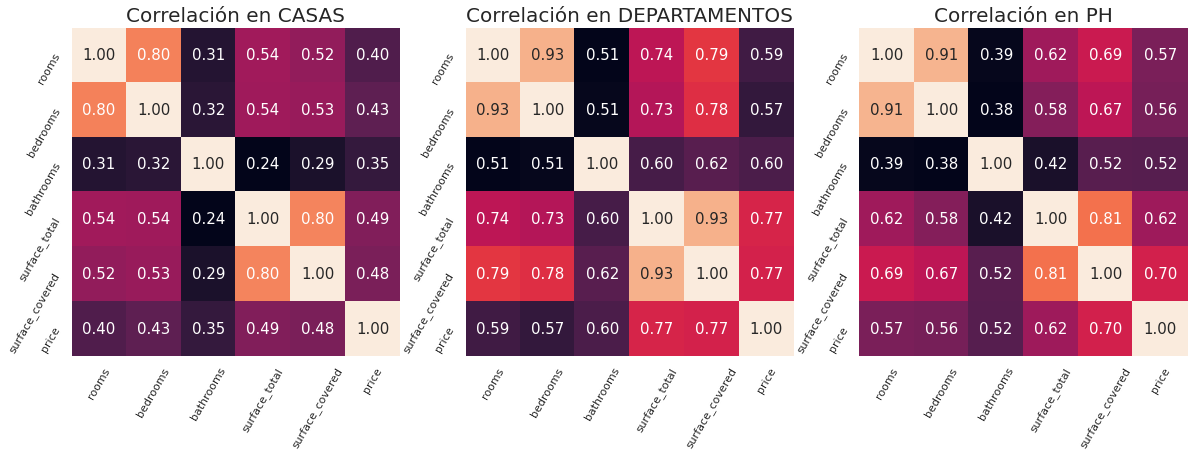

In [52]:
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
corr_casas = casas.corr(method='pearson', min_periods=1)
sns.heatmap(corr_casas, cbar = False,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 15}) 
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en CASAS', size = 20)

plt.subplot(1,3,2)
corr_dptos = dptos.corr(method='pearson', min_periods=1) 
sns.heatmap(corr_dptos, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}) 
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en DEPARTAMENTOS', size = 20)

plt.subplot(1,3,3)
corr_ph = ph.corr(method='pearson', min_periods=1) 
sns.heatmap(corr_ph, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15})
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en PH', size = 20)


plt.show()


# Normalización de datos (One-Hot Encoding)
Transformaremos los valores categoricos (que tanto influyen a las categorias) con get_dummies.



In [53]:
data_clean.head()

,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,PH,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,2.0,1.0,1.0,85.0,50.0,295000.0
5,PH,2.0,1.0,1.0,56.0,56.0,150000.0
6,PH,2.0,1.0,1.0,70.0,70.0,159500.0


In [54]:

#One-Hot Encoding
#dummies_l3 = pd.get_dummies(data_clean['l3'])
#dummies_l2 = pd.get_dummies(data_clean['l2'])
dummies_property_type = pd.get_dummies(data_clean['property_type'])
df_clean = pd.concat([data_clean,dummies_property_type], axis=1)
df_clean = df_clean.drop(['property_type'], axis=1)
df_clean

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
6,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146544,3.0,2.0,2.0,120.0,82.0,430000.0,0,1,0
146545,3.0,2.0,2.0,88.0,82.0,399000.0,0,1,0
146549,3.0,2.0,1.0,84.0,84.0,178000.0,0,0,1
146550,5.0,2.0,2.0,114.0,95.0,298000.0,0,0,1


# Escalado de datos
Es necesario escalar los datos ya que las variables bathrooms, bedrooms y rooms tienen las mismas unidades, valores enteros chicos, mientras que las variables surface_total y surface_covered estan dadas en 𝑚2. Por lo que es buena idea hacer una estandarizacion de los datos para que esta diferencia en unidades no afecte al modelo.

Cada variable tiene que ser analizada de forma independiente para decidir que tipo de escalado de datos utilizar. Veamos la distribucion de las variables para luego tomar las decisiones.

Primero escalaré las variables discretas:

In [55]:

#Escalado
from sklearn.preprocessing import StandardScaler
data_scaled = df_clean.copy()

columns_to_scale = ['rooms', 'bedrooms', 'bathrooms']
features = data_scaled[columns_to_scale]

scaler = StandardScaler().fit(features.values)
feature = scaler.transform(features.values)
data_scaled[columns_to_scale] = feature

por otro lado escalo las variables de superficie

In [56]:
scaler_df = data_scaled.copy()
columns_to_scale  = ['surface_total', 'surface_covered']

scaler = StandardScaler()
scaled = scaler.fit_transform(scaler_df[columns_to_scale])

columns_left = scaler_df.copy()
columns_left = columns_left.drop(columns = columns_to_scale)

resulted_values = pd.DataFrame(scaled, index=scaler_df.index, columns=scaler_df[columns_to_scale].columns)
frames = [resulted_values,columns_left]
data_scaled = pd.concat(frames,axis=1)

data_scaled.head()

,surface_total,surface_covered,rooms,bedrooms,bathrooms,price,Casa,Departamento,PH
1,-0.019498,-0.153367,-0.705593,-0.944474,1.272711,159000.0,0,0,1
2,-0.781424,-0.636408,-0.705593,-0.944474,-0.579517,125000.0,0,0,1
3,0.437657,-0.450623,-0.705593,-0.944474,-0.579517,295000.0,0,0,1
5,-0.446176,-0.227681,-0.705593,-0.944474,-0.579517,150000.0,0,0,1
6,-0.019498,0.292518,-0.705593,-0.944474,-0.579517,159500.0,0,0,1



# SVD/PCA - Generación de nuevas variabLes predictoras/reducción de dimensionalidad
La idea de PCA es reducir o proyectar nuestra información a un espacio de dimensión menor, pero también puede servir para construir un indicador. Este será el ejemplo central de esta entrada.

Una observación fundamental es que PCA es efectivo cuando la correlación entre variables es alta, es decir; la linealidad entre nuestras variables no es cero. Nuestro dataset es compatible con esta situación, por la cual aplicaremos:

In [57]:

from sklearn.decomposition import PCA

In [58]:
X2 = data_scaled.drop(["price"], axis=1)
y = data_scaled.price

In [59]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X2)

X_pca

array([[-0.33721749,  1.52883972,  0.520574  ,  1.35217836],
       [-1.57135558, -0.10030182,  0.37614769,  1.24015844],
       [-0.91974381, -0.10799927,  1.192685  ,  1.14770988],
       ...,
       [ 0.77883959, -0.88270501,  0.6823905 ,  0.93231676],
       [ 3.04688419,  0.03839233,  0.0512236 ,  1.16319451],
       [ 3.30220543,  0.88186151,  1.9263953 , -0.78811062]])

# ML de P1
Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. Sea cual sea la respuesta, intenta explicar a qué se debe.

Rescato el modelo entrenado en P1 pero con el dataset de este proyecto para comparar rendimiento.

Rendimiento Último y mejor modelo de P1 - Arbol de Decisión1 (con variables dummies agregadas en property_type):

max_depth = 17
RMSE ÁRBOL 1

La raíz del error cuadrático medio en Train es de: 70095.58150028698
La raíz del error cuadrático medio en Test es de: 150465.1206172948
Realizaré el mismo procedimiento pero con éste nuevo dataset df_clean. El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

In [60]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df_clean.drop(['price'], axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47162, 4) (47162,) (20213, 4) (20213,)


In [61]:
df_clean.shape

(67375, 9)

In [62]:

print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  178461.5645222849
Proporcion de etiquetas positiva en los datos de Test:  179819.01657349232


Ahora, al igual que en Proyecto 1 buscamos el mejor parametro y entrenamos modelo con menos error.

In [63]:
lista_rmse_train_tree = []
lista_rmse_test_tree = []
rmse_train = 0
rmse_test = 0
max_depths = [1,5,6,7,8,9,10,10.5,11,12,13,14,15,16,17,18,19,20,21,22,24,25,30,40,45,50,55]

for i in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth = i)
    tree_reg.fit(X_train,y_train)
    
    y_train_pred_tree = tree_reg.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))

    y_test_pred_tree = tree_reg.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
    
    lista_rmse_train_tree.append(rmse_train)
    lista_rmse_test_tree.append(rmse_test)

El mínimo de RMSE en test es  44130.61856354476  en  14  profundidad del árbol.


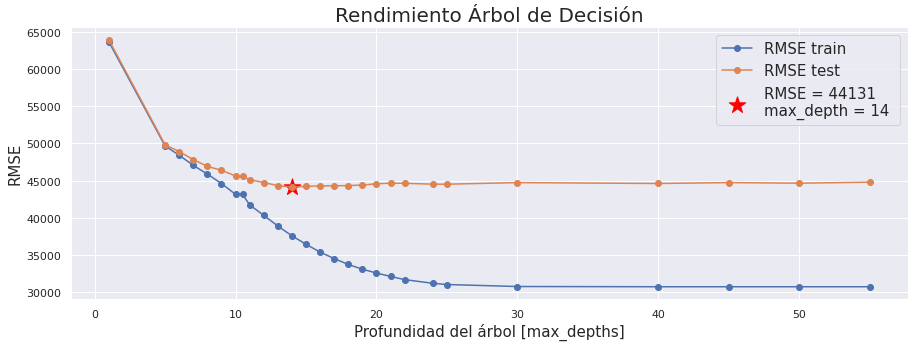

In [64]:

min_test_tree = np.amin(lista_rmse_test_tree)
lista_rmse_test_tree_op = lista_rmse_test_tree.index(min(lista_rmse_test_tree))
max_depths_op = max_depths[lista_rmse_test_tree_op]
print('El mínimo de RMSE en test es ', min_test_tree, ' en ', max_depths_op, ' profundidad del árbol.')

plt.figure(figsize=(15,5))

plt.plot(max_depths, lista_rmse_train_tree, 'o-', label = 'RMSE train')
plt.plot(max_depths, lista_rmse_test_tree, 'o-', label = 'RMSE test')
plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento Árbol de Decisión', size = 20)
plt.scatter(max_depths_op, min_test_tree, s=300, marker = '*', 
         label = 'RMSE = {} \nmax_depth = {} '.format(round(min_test_tree),max_depths_op), color = 'red')
plt.legend(loc = 'upper right', fontsize = 15)
plt.savefig('Arbol1.png')

plt.show()

In [65]:
tree_regressor = DecisionTreeRegressor(max_depth =17)
tree_regressor.fit(X_train, y_train)
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_tree}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_tree}')
#Bechmarck para parte B

La raíz del error cuadrático medio en TRAIN es de $34532.782944198014
La raíz del error cuadrático medio en TEST es de $44371.50762263616


In [66]:

dism_train =(((rmse_train_tree-70095.581)/70095.581)*100) #formula de crecimiento
dism_test = (((rmse_test_tree-150465.120)/150465.120)*100)
print('Diferencia del RMSE entre P1 y P2 de train en un %', dism_train)
print('Diferencia del RMSE entre P1 y P2 de test en un %', dism_test)

Diferencia del RMSE entre P1 y P2 de train en un % -50.73472185900276
Diferencia del RMSE entre P1 y P2 de test en un % -70.51043615780445


en comparacion con el tp1 el error en train disminuyo en 51% y el de test en 70%, utilizando las tecnicas avanzadas de pre procesamiento, con el mismo dataset sugerido del tp1


# PARTE B - Modelos Avanzados
Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.
Modelos Avanzados para mejorar nuestros análisis y modelos de Machine Learning con el Preprocesamiento de Datos; me planteo un objetivo personal: mejorar el rendimiento y disminuir RMSE de DecisionTreeRegressor utilizando como parametro el modelo anterior, es decir mi BENCHMARK DecisionTreeRegressor

La raíz del error cuadrático medio en TRAIN es de $33682.90090436593


La raíz del error cuadrático medio en TEST es de $44156.42190956156

In [67]:
from sklearn.ensemble import BaggingRegressor
from xgboost.sklearn import XGBRegressor

import xgboost as xgb
import scipy as sp

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
#Decido explorar estos modelos

tree = DecisionTreeRegressor()
bagging = BaggingRegressor()
forest = RandomForestRegressor()
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=250)
linear_model = LinearRegression()

In [69]:
param_tree = {"criterion": ["mse", "friedman_mse"],
             "max_depth": sp.stats.randint(2, 20),
             "min_samples_split": sp.stats.randint(2, 20)}

In [70]:
tree_opt = RandomizedSearchCV(tree, param_tree, 
                              n_iter = 100, 
                              random_state = 42, 
                              cv = 5, n_jobs = -1)

tree_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [71]:
print('DecisionTreeRegressor optimizado con RandomSearchCV')

y_train_predCV = tree_opt.predict(X_train)
y_test_predCV = tree_opt.predict(X_test)

rmse_train_treeRSCV = np.sqrt(mean_squared_error(y_train, y_train_predCV))
rmse_test_treeRDCV = np.sqrt(mean_squared_error(y_test, y_test_predCV))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_treeRSCV}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_treeRDCV}')

DecisionTreeRegressor optimizado con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $35560.452088483646
La raíz del error cuadrático medio en TEST es de $44235.55009960354


AUMENTA UN POCO EL ERROR DE TRAIN, PERO DISMINUYE TAMBIEN EL DE TEST

**BAGGING CON DECISION TREE REGRESSOR**

In [72]:
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        bootstrap = True,
                        bootstrap_features= False,
                        n_estimators = 500,
                        n_jobs = -1)

In [73]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [74]:

print('BaggingRegressor con DecisionTreeRegressor')

y_train_predBG = bagging.predict(X_train)
y_test_predBG = bagging.predict(X_test)

rmse_train_treeBG = np.sqrt(mean_squared_error(y_train, y_train_predCV))
rmse_test_treeBG = np.sqrt(mean_squared_error(y_test, y_test_predBG))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_treeBG}')
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_test_treeBG}')

BaggingRegressor con DecisionTreeRegressor


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


La raíz del error cuadrático medio en TRAIN es de $35560.452088483646
La raíz del error cuadrático medio en TRAIN es de $40900.54145960815


AUMENTA UN POCO EL ERROR DE TRAIN, NO OBSTANTE DISMINUYE EN MAYOR PROPORCION QUE EL ANTERIOR MODELO

**Random Forest**

In [75]:

forest = RandomForestRegressor(n_estimators=1000, 
                             max_features="sqrt", 
                             n_jobs=-1, 
                             oob_score = False, 
                             random_state = 42)

In [76]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [77]:
print('RandomForest')

y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_forest}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_forest}') #el mejor!

RandomForest
La raíz del error cuadrático medio en TRAIN es de $31785.56214316028
La raíz del error cuadrático medio en TEST es de $40863.3819337601


el mejor modelo hasta el momento, incluso en Train

**Random Forest Optimizado con Random Search**

In [78]:
random1 = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rf_random = RandomizedSearchCV(RandomForestRegressor(), 
       param_distributions = random1, 
       n_iter = 10, 
       cv = 3, 
       n_jobs = -1)

In [79]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [80]:
print('RandomForest optmizado con RandomSearchCV')

y_train_forestCV = rf_random.predict(X_train)
y_test_forestCV = rf_random.predict(X_test)

rmse_train_forestCV = np.sqrt(mean_squared_error(y_train, y_train_forestCV))
rmse_test_forestCV = np.sqrt(mean_squared_error(y_test, y_test_forestCV))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_forestCV}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_forestCV}')

RandomForest optmizado con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $33463.17901229912
La raíz del error cuadrático medio en TEST es de $40912.195165857425


aunque haya disminuido muy levemente el error en test, no justifica la sobre complicacion del modelado para tan poco trade off

**Polinomial Regression**

In [81]:
linear = LinearRegression()

In [82]:

linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
print('Regresión polinómica')

y_train_pred_linear = linear.predict(X_train)
y_test_pred_linear = linear.predict(X_test)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_linear}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_linear}') #el peor

Regresión polinómica
La raíz del error cuadrático medio en TRAIN es de $51421.92913969761
La raíz del error cuadrático medio en TEST es de $51468.56304396617


El peor modelo, aumento excesivamente el error en test y train

**ADABoost optimizado con random search**

In [84]:

param_ada = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }


In [85]:

adaboost = RandomizedSearchCV(AdaBoostRegressor(),
                              param_distributions = param_ada,
                              cv=3,
                              n_iter = 10,
                              n_jobs=-1)

In [86]:

adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [87]:
print('AdaBoost optmizado con RandomSearchCV')

y_train_pred_adaboost = adaboost.predict(X_train)
y_test_pred_adaboost = adaboost.predict(X_test)

rmse_train_adaboost = np.sqrt(mean_squared_error(y_train, y_train_pred_adaboost))
rmse_test_adaboost = np.sqrt(mean_squared_error(y_test, y_test_pred_adaboost))

print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_adaboost}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_adaboost}')

AdaBoost optmizado con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $52253.45651787416
La raíz del error cuadrático medio en TEST es de $52248.31837543893


este modelo es oficialmente el de peor rendimiento, incluso peor que el polinomico

**XGB Regressor**

In [88]:
xg_model = XGBRegressor(objective="reg:squarederror")

In [89]:

xg_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [90]:
print('XGBRegressor')

y_train_pred_xgbr = adaboost.predict(X_train)
y_test_pred_xgbr = adaboost.predict(X_test)

rmse_train_xgbr = np.sqrt(mean_squared_error(y_train, y_train_pred_xgbr))
rmse_test_xgbr = np.sqrt(mean_squared_error(y_test, y_test_pred_xgbr))

print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_xgbr}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_xgbr}')

XGBRegressor
La raíz del error cuadrático medio en TRAIN es de $52253.45651787416
La raíz del error cuadrático medio en TEST es de $52248.31837543893


**XGBoost + Random Search**

In [91]:
parameters = {
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }

In [92]:

xg_model_opt = XGBRegressor(objective ='reg:squarederror')

xg_model_opt = RandomizedSearchCV(xg_model_opt, parameters, cv=5)

xg_model_opt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [93]:
print('XGBRegressor con RandomSearchCV')

y_train_pred_xgbr2 = adaboost.predict(X_train)
y_test_pred_xgbr2 = adaboost.predict(X_test)

rmse_train_xgbr2 = np.sqrt(mean_squared_error(y_train, y_train_pred_xgbr2))
rmse_test_xgbr2 = np.sqrt(mean_squared_error(y_test, y_test_pred_xgbr2))

print(f'La raíz del error cuadrático medio en TRAIN es de ${rmse_train_xgbr2}')
print(f'La raíz del error cuadrático medio en TEST es de ${rmse_test_xgbr2}')

XGBRegressor con RandomSearchCV
La raíz del error cuadrático medio en TRAIN es de $52253.45651787416
La raíz del error cuadrático medio en TEST es de $52248.31837543893


# Resultados finales

In [94]:
print('DecisionTreeRegressor optimizado manualmente')

print(f'RMSE en TRAIN es de ${rmse_train_tree}')
print(f'RMSE en TEST es de ${rmse_test_tree}')
print('-')
print('DecisionTreeRegressor con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_treeRSCV}')
print(f'RMSE en TEST es de ${rmse_test_treeRDCV}')
print('-------------------------------------')

print('RandomForest')

print(f'RMSE en TRAIN es de ${rmse_train_forest}')
print(f'RMSE en TEST es de ${rmse_test_forest}')
print('-')
print('RandomForest optmizado con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_forestCV}')
print(f'RMSE en TEST es de ${rmse_test_forestCV}')
print('-------------------------------------')


print('Regresión polinómica')

print(f'RMSE en TRAIN es de ${rmse_train_linear}')
print(f'RMSE en TEST es de ${rmse_test_linear}') 
print('-------------------------------------')

print('AdaBoost optmizado con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_adaboost}')
print(f'RMSE en TEST es de ${rmse_test_adaboost}')
print('-------------------------------------')

print('XGBRegressor')

print(f'RMSE en TRAIN es de ${rmse_train_xgbr}')
print(f'RMSE en TEST es de ${rmse_test_xgbr}')
print('-')
print('XGBRegressor con RandomSearchCV')

print(f'RMSE en TRAIN es de ${rmse_train_xgbr2}')
print(f'RMSE en TEST es de ${rmse_test_xgbr2}')
print('-------------------------------------')

DecisionTreeRegressor optimizado manualmente
RMSE en TRAIN es de $34532.782944198014
RMSE en TEST es de $44371.50762263616
-
DecisionTreeRegressor con RandomSearchCV
RMSE en TRAIN es de $35560.452088483646
RMSE en TEST es de $44235.55009960354
-------------------------------------
RandomForest
RMSE en TRAIN es de $31785.56214316028
RMSE en TEST es de $40863.3819337601
-
RandomForest optmizado con RandomSearchCV
RMSE en TRAIN es de $33463.17901229912
RMSE en TEST es de $40912.195165857425
-------------------------------------
Regresión polinómica
RMSE en TRAIN es de $51421.92913969761
RMSE en TEST es de $51468.56304396617
-------------------------------------
AdaBoost optmizado con RandomSearchCV
RMSE en TRAIN es de $52253.45651787416
RMSE en TEST es de $52248.31837543893
-------------------------------------
XGBRegressor
RMSE en TRAIN es de $52253.45651787416
RMSE en TEST es de $52248.31837543893
-
XGBRegressor con RandomSearchCV
RMSE en TRAIN es de $52253.45651787416
RMSE en TEST es d

El modelo con mejor performance es el random forest , aunque su version optimizada mejora levemente, no es conveniente hacer mas complejo el modelo sin un trade off significativo

# Parte C modelos avanzados
Con estos resultados noto que el mejor modelo es el random forest sin optimzar, seguido del decision tree regressor optimizado

Por eso lado, por tratarse de modelos avanzados elijo en este caso RandomForest

Graficaré las variables con más influencia en la proyección en ambos modelos:

Modelo: Árbol Optimizado
Raíz del error cuadrático medio en Train: 35560.452088483646
Raíz del error cuadrático medio en Test: 44235.55009960354


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


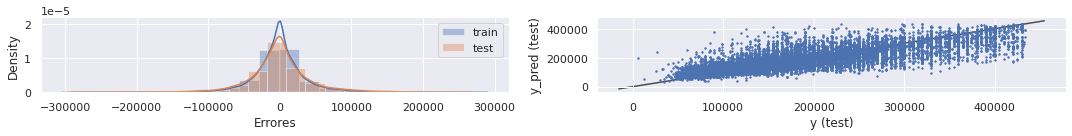

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 31785.56214316028
Raíz del error cuadrático medio en Test: 40863.3819337601


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


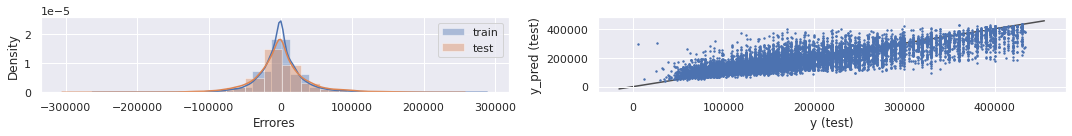

Modelo: Random Forest optimizado
Raíz del error cuadrático medio en Train: 33463.17901229912
Raíz del error cuadrático medio en Test: 40912.195165857425


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


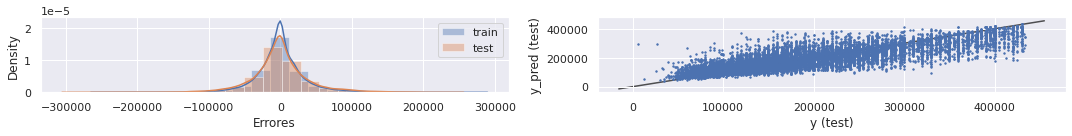

In [95]:
modelos = ['Árbol Optimizado', 'Random Forest', 'Random Forest optimizado',]

for i, model in enumerate([tree_opt, forest, rf_random]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,2))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

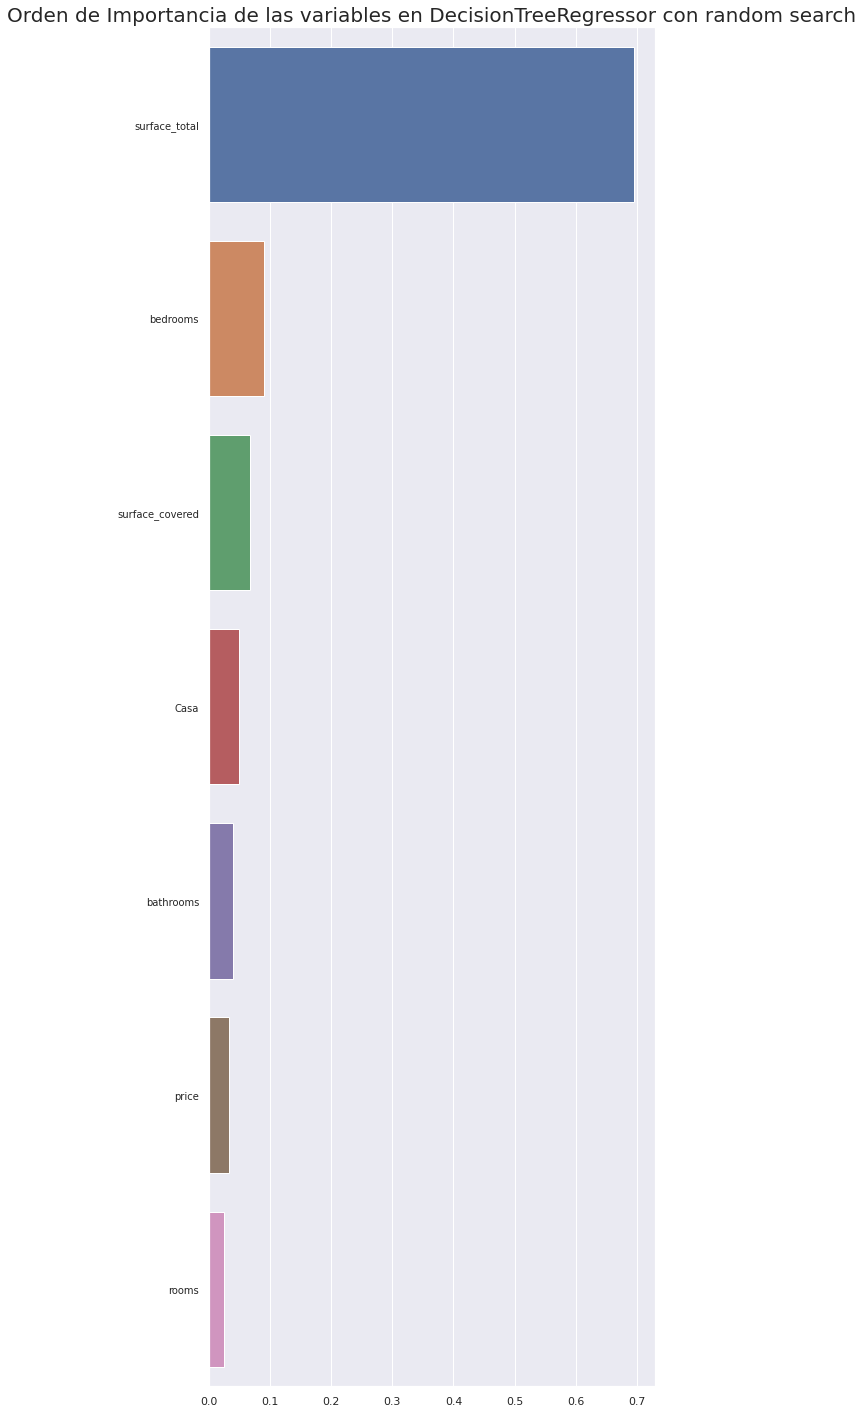

In [ ]:

importances = tree_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
columns = data_scaled.columns

plt.figure(figsize = (8,25))
plt.title("Orden de Importancia de las variables en DecisionTreeRegressor con random search", fontsize= 20)
plt.yticks(rotation= 0, fontsize= 10, horizontalalignment= 'right')
sns.barplot(y=columns[indices], x=importances[indices])
plt.show()

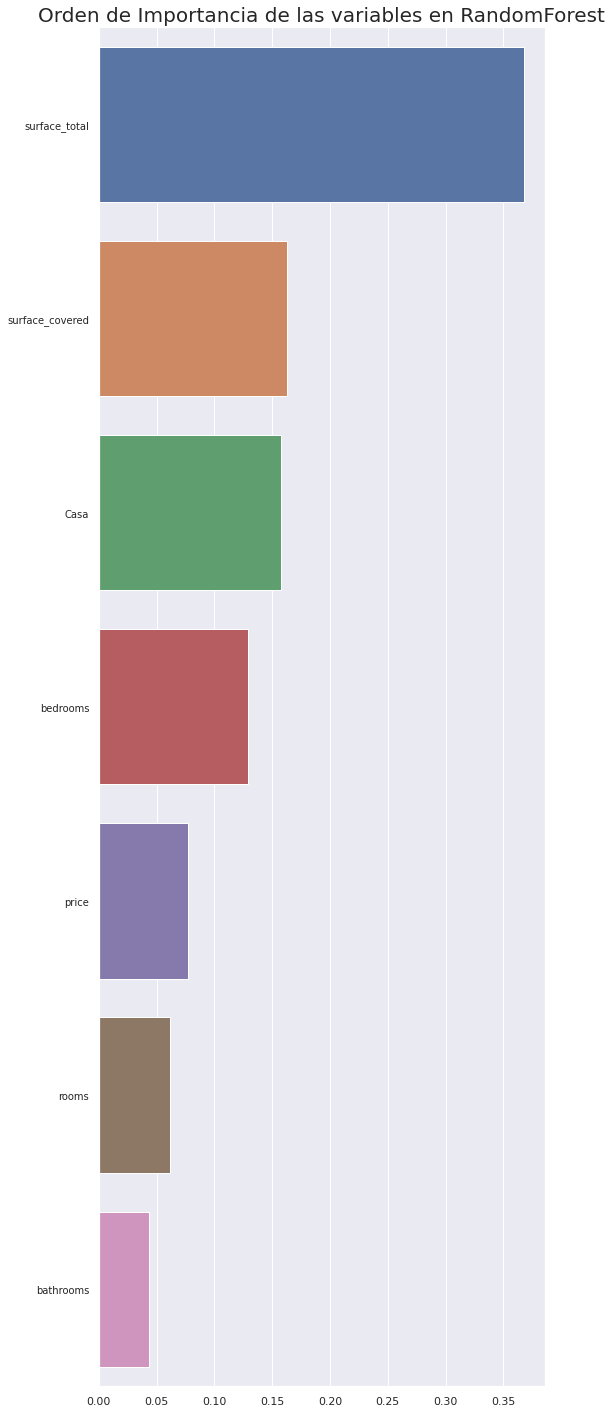

In [ ]:

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
columns = data_scaled.columns

plt.figure(figsize = (8,25))
plt.title("Orden de Importancia de las variables en RandomForest", fontsize= 20)
plt.yticks(rotation= 0, fontsize= 10, horizontalalignment= 'right')
sns.barplot(y=columns[indices], x=importances[indices])
plt.show()

en conclusion basicamente las mismas features fueron las de mayor importancia en ambos modelos, las superficies, Casa que infiero que esta ahi por el hecho de que sus superficies son generalmente superiores a los dptos y ph, y bedrooms que tiene logica

Sigo creyendo que errores de mas de 30kusd para precios de propiedades es demasiado grande, y que se podria mejorar el modelo quizas usando mas fuentes de datos, para hacer un data wrangling, de por ejemplo lugares de interes cerca de las propiedades, año de construccion, o acceso a transporte publico.

Tambien creo que no se debio dropear los barrios y zonas de GBA, o por el contrario tener modelos por zonas y por tipo de propiedad.